In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager
from scipy import stats
import math
import numpy as np
import sys
import seaborn as sns
import matplotlib


def get_times_from_usrbintime(f):
    user_time = 0
    cpu_time = 0
    max_rss = 0
    wall_time = 0
    for line in open(f, 'r'):
        if 'User time' in line:
            user_time = float(line.split(':')[-1].rstrip())
        elif 'System time' in line:
            system_time = float(line.split(':')[-1].rstrip())
            cpu_time = user_time + system_time
        elif 'Maximum resident' in line:
            max_rss = round(float(line.split(':')[-1].rstrip())/1000000,2)
        elif 'wall clock' in line:
            str_time = line.split()[-1].rstrip()
            str_time = str_time.split(':');
            if len(str_time) == 3:
                wall_time = float(str_time[0]) * 3600 + float(str_time[1]) * 60 + float(str_time[2].rstrip())
            else:
                wall_time = float(str_time[0]) * 60 + float(str_time[1].rstrip())
    if cpu_time > 1:
        cpu_time = int(cpu_time)

    return [wall_time, cpu_time, max_rss]

[0, 21.73, 0, 0, 0]


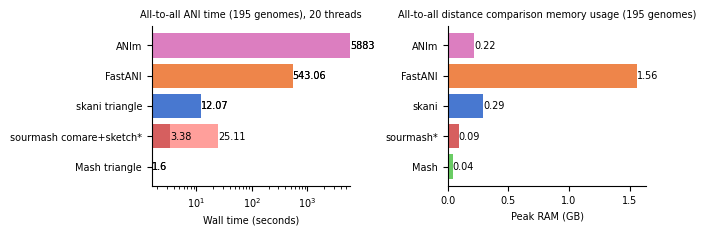

In [50]:
cm = 1/2.54  # centimeters in inches
plt.rcParams.update({'font.size': 7})
plt.rcParams.update({'figure.autolayout': True})
plt.figure(figsize=(17*cm, 6*cm))
cmap = sns.color_palette("muted")
cmap_d = sns.color_palette("pastel")

wall = True
time = True
log_scale = True
#plt.style.use(['nature'])
#plt.style.reload_library()


fastani_2328_file = "../times/fastani_2328_triangle.time"
skani_2328_file = "../times/skani_2328_triangle.time"
anim_2328_file = "../times/anim_2328.time"
mash_2328_file = "..//times/mash_2328_triangle.time"
sourmash_2328_sketch_file = "../times/sourmash_2328_sketch.time"
sourmash_2328_query_file = "../times/sourmash_2328_triangle.time"

fastani_time = get_times_from_usrbintime(fastani_2328_file)
skani_time = get_times_from_usrbintime(skani_2328_file)
mash_time = get_times_from_usrbintime(mash_2328_file)
anim_time = get_times_from_usrbintime(anim_2328_file)
sourmash_sketch_time = get_times_from_usrbintime(sourmash_2328_sketch_file)
sourmash_query_time = get_times_from_usrbintime(sourmash_2328_query_file)
sourmash_time = [sourmash_sketch_time[i] + sourmash_query_time[i] for i in range(len(sourmash_query_time))]
rot = 0

colours = [cmap[2], cmap[3], cmap[0],cmap[1],  cmap[6]]

wall_times_index = [ mash_time[0],sourmash_query_time[0],skani_time[0], fastani_time[0],  anim_time[0] ]
cpu_times_index = [ mash_time[1], sourmash_query_time[1],skani_time[1], fastani_time[1], anim_time[1] ]
labels = ["Mash triangle", "sourmash comare+sketch*","skani triangle", "FastANI", "ANIm"]
ax = plt.subplot(1,2,1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
wall_times_sourmash = [0, sourmash_sketch_time[0], 0, 0, 0]
cpu_times_sourmash = [0,sourmash_sketch_time[0], 0, 0, 0]

print(dataset1)
if wall:
    bars2 = plt.barh([1,2,3,4,5], wall_times_sourmash, log = log_scale, label=labels, tick_label=labels, left = wall_times_index, color=cmap_d[3])
    bars = plt.barh([1,2,3,4,5], wall_times_index, log=log_scale, label=labels, tick_label = labels , color = colours,)
    #bars = plt.barh([1,2,3,4,5], wall_times_index , color = colours)
    #bar2 = plt.barh([1,2,3,4,5], dataset1, left = wall_times_index, color='r')

    plt.xlabel("Wall time (seconds)")
else:
    bars = plt.barh([1,2,3,4,5], cpu_times_index, log=log_scale, label=labels, tick_label = labels , color = colours)
    plt.xlabel("CPU time (seconds)")
plt.bar_label(bars)
plt.bar_label(bars2)

#plt.hlines(y=skani_time_index[1] + skani_time_dist[1], xmin=1.5, xmax=3.5, linewidth=2, color=cmap[0], label = 'mash total time')
#plt.hlines(y=mash_time_index[1] + mash_time_dist[1], xmin=4.5, xmax=6.5, linewidth=2, color=cmap[2], label = 'skani total time')
plt.xticks(rotation = rot) # Rotates X-Axis Ticks by 45-degrees
plt.title("All-to-all ANI time (195 genomes), 20 threads", fontsize = 7 )
    
ax = plt.subplot(1,2,2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

memory_usage_all = [ mash_time[2],max(sourmash_query_time[2], sourmash_sketch_time[2]),skani_time[2], fastani_time[2],  anim_time[2] ]
labels = ["Mash", "sourmash*","skani", "FastANI", "ANIm"]
bars = plt.barh([1,2,3,4,5], memory_usage_all, log=False, label=labels, tick_label = labels , color = colours)
plt.bar_label(bars)

plt.title("All-to-all distance comparison memory usage (195 genomes)", fontsize = 7 )

plt.xticks(rotation = rot) # Rotates X-Axis Ticks by 45-degrees
plt.xlabel("Peak RAM (GB)") 
    
plt.savefig("figures/2328-all-to-all.svg", transparent = True)
plt.show()